# Fitting Code

Fit data from predator-prey spreadsheet, with error calculation for all predator species.

Recent changes:

|Date      |Notes                                                           |
|----------|----------------------------------------------------------------|
|12/3/20   |Access to Excel spreadsheet columns AA to CZ added.             |
|12/3/20   |Add code to find values in cells (findCellValues).              |
|21/3/20   |Implement multi-species biomass density errors.                 |

## Spreadsheet functions
Define functions for extracting information from spreadsheets.

In [1]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# These libraries allow us to read and write excel spreadsheets
import ipysheet as xl
import openpyxl
# 
def findCellString(sheet, target):
    '''
    Given the sheet name in an excel spreadsheet and a target string, return the indices of the cell containing the target.
    Only works for columns up to CZ!
    '''
    if not hasattr(findCellString, "alphabet"):
        findCellString.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                                   "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                                   "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                                   "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                                   "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                                   "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                                   "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                                   "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
    #
    targetCell = []
    for row in range(sheet.min_row, sheet.max_row):
        for col in findCellString.alphabet: 
            cell = "{}{}".format(col, row)
            if sheet[cell].value == target:
                targetCell.append(cell)
    return targetCell
# 
def findCellValue(sheet, target):
    '''
    Given the sheet name in an excel spreadsheet and a target value, return the indices of the cell containing the target.
    Only works for columns up to CZ!
    '''
    if not hasattr(findCellValue, "alphabet"):
        findCellValue.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                                  "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                                  "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                                  "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                                  "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                                  "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                                  "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                                  "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
        findCellValue.tol = 1E-12
    #
    targetCell = []
    for row in range(sheet.min_row, sheet.max_row):
        for col in findCellValue.alphabet: 
            cell = "{}{}".format(col, row)
            try:
                val = float(sheet[cell].value)
                if np.abs(float(sheet[cell].value) - target) < findCellValue.tol:
                    targetCell.append(cell)
            except:
                continue
    return targetCell
#
def cellInds(cell):
    '''
    Given the row and column of a cell in an excel spreadsheet, return its indices.
    Only works for columns up to BZ!
    '''
    if not hasattr(cellInds, "alphabet"):
        cellInds.alphabet = ("A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M",
                             "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z",
                             "AA", "AB", "AC", "AD", "AE", "AF", "AG", "AH", "AI", "AJ", "AK", "AL", "AM",
                             "AN", "AO", "AP", "AQ", "AR", "AS", "AT", "AU", "AV", "AW", "AX", "AY", "AZ",
                             "BA", "BB", "BC", "BD", "BE", "BF", "BG", "BH", "BI", "BJ", "BK", "BL", "BM",
                             "BN", "BO", "BP", "BQ", "BR", "BS", "BT", "BU", "BV", "BW", "BX", "BY", "BZ",
                             "CA", "CB", "CC", "CD", "CE", "CF", "CG", "CH", "CI", "CJ", "CK", "CL", "CM",
                             "CN", "CO", "CP", "CQ", "CR", "CS", "CT", "CU", "CV", "CW", "CX", "CY", "CZ")
    #
    number = ''
    for s in cell:
        if s.isdigit():
            number += s
    letters = ''
    for s in cell:
        if s.isalpha():
            letters += s
#
    try:
        col = cellInds.alphabet.index(letters) + 1
        row = int(number)
    except:
        col = -1
        row = -1
    return row, col
# 
# Create list of column values
def colList(sheet, col, minRow, maxRow):
    '''
    Given the sheet name in an excel spreadsheet, the required column, return a list  of all the values
    in the column between the minimum and maximum row numbers.
    '''
    colVals = []
    for row in range(minRow, maxRow):
        colVals.append(sheet.cell(row, col).value) 
    #
    return colVals
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-24 13:49:30.249391
 
Date and time 2020-04-24 13:49:31.456696
Time since last check is 0:00:01.207305


## Load spread sheet

Load spread sheet and test spreadsheet functions.

In [2]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
import os
import pandas as pd
import numpy as np
#
# Open Predator-Prey (PP) spreadsheet (data_only = True means values in cells read, not formulae)
PPbook = openpyxl.load_workbook('Predator-Prey-DB.xlsx', data_only = True)
PPnames = PPbook.sheetnames
print("Predator-Prey sheet names are:\n",PPnames)
PPsheet = PPbook['Land']
print("Active is",PPsheet)
#
print(" ")
print("Test findCellString")
findString = 'African Predators vs Prey (>5kg) Biomass'
print("findCellString(PPsheet, '" + findString +"') =", findCellString(PPsheet, findString))
print(" ")
print("Test findCellValue")
findValue = 10.69
print("findCellValue(PPsheet, " + str(findValue) +") =", findCellValue(PPsheet, findValue))
print(" ")
print("Test cellInds")
findCell = 'AA137'
print("cellInds(",findCell,") =", cellInds(findCell))
findCell = 'AA7'
print("cellInds(",findCell,") =", cellInds(findCell))
row, col = cellInds(findCell)
print("PPsheet(",row,",",col,").value =",PPsheet.cell(row, col).value)
print(" ")
print("Test colList")
column = 30 # column AD
rowTop = 74
rowBot = 119 + 1
print("colList(PPsheet,",column,",",rowTop,",",rowBot,")\n", colList(PPsheet, column, rowTop, rowBot))
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))

Date and time  2020-04-24 13:49:31.472860
Predator-Prey sheet names are:
 ['Refs', 'eco', 'ind', 'Land', 'Averages Data', 'Aqua']
Active is <Worksheet "Land">
 
Test findCellString
findCellString(PPsheet, 'African Predators vs Prey (>5kg) Biomass') = ['A4', 'A260', 'A281']
 
Test findCellValue
findCellValue(PPsheet, 10.69) = ['D290']
 
Test cellInds
cellInds( AA137 ) = (137, 27)
cellInds( AA7 ) = (7, 27)
PPsheet( 7 , 27 ).value = White Rhino
 
Test colList
colList(PPsheet, 30 , 74 , 120 )
 [42.9, 550, 70, 267, 4540, 2194.02986333333, 3000, 2780, None, 5605.49, 98, 3500, 3750, 2797, 627, 3000, 35, 95, 499.333333333333, 1993.2, None, None, 154, 127, 28, None, 56, 185.125, 105.7, 105.7, 32, 0.1, 398, 1450, 6.2, 30, 45, 5027, 15000, 34200, 13420, 5872, 3737, 400, 100, 185]
 
Date and time 2020-04-24 13:49:45.065015


## Perform error analysis for multiple species

Now calculate reasonable errors for predator biomass density. 

For a given species $i$ (e.g. lions), the biomass per unit area, $b_i$, is given by:

$$b_i = \frac{n_i m_i}{A}.$$

The biomass per unit area for all predator species is: 

\begin{align}
B &= b_1 + b_2 + \dots \\
  &= \frac{n_1 m_1}{A} + \frac{n_2 m_2}{A} + \dots
\end{align}

This means the error on $B$ is:

\begin{align}
\Delta B &= \sqrt{ \left( \frac{\partial B}{\partial n_1} \Delta n_1 \right)^2 + 
                   \left( \frac{\partial B}{\partial m_1} \Delta m_1 \right)^2 + 
                   \left( \frac{\partial B}{\partial n_2} \Delta n_2 \right)^2 + 
                   \left( \frac{\partial B}{\partial m_2} \Delta m_2 \right)^2 + \dots +
                   \left( \frac{\partial B}{\partial A} \Delta A \right)^2 } \\
         &= \sqrt{ \left( \frac{m_1}{A} \Delta n_1 \right)^2 + 
                   \left( \frac{n_1}{A} \Delta m_1 \right)^2 +
                   \left( \frac{m_2}{A} \Delta n_2 \right)^2 + 
                   \left( \frac{n_2}{A} \Delta m_2 \right)^2 + \dots + 
                   \left( \frac{n_1 m_1 + n_2 m_2 +\dots}{A^2} \Delta A \right)^2 } \\
         &= \sqrt{ \left( \frac{m_1}{A} \Delta n_1 \right)^2 + 
                   \left( \frac{n_1}{A} \Delta m_1 \right)^2 +
                   \left( \frac{m_2}{A} \Delta n_2 \right)^2 + 
                   \left( \frac{n_2}{A} \Delta m_2 \right)^2 + \dots + 
                   \left( \frac{B}{A} \Delta A \right)^2 } \\
         &= \frac{1}{A}\sqrt{ \left( m_1 \Delta n_1 \right)^2 + 
                              \left( m_2 \Delta n_2 \right)^2 + \dots +
                              \left( n_1 \Delta m_1 \right)^2 +  
                              \left( n_2 \Delta m_2 \right)^2 + \dots +
                              \left( B \Delta A \right)^2 }.
\end{align}

## Calculate biomass density and its errors for LEOPARDS

In [3]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at SE Africa
# There are six predator species (lions, spotted hyena, leopards, cheetah, brown hyena and wild dogs)
# Abundance data starts and finishes at: 
cPredBegLeft, cPredBegRight = 'J74', 'J74'
#
# Animal mass data cells
cPredMassLeft, cPredMassRight = 'J71', 'J71'
#
# Find beginning row and column indices and number of predator columns
nPredRowTop, nPredColLeft = cellInds(cPredBegLeft)
nPredRowTop, nPredColRight = cellInds(cPredBegRight)
nPredCols = nPredColRight - nPredColLeft + 1
print(" ")
print("nPredColRight",nPredColRight,"nPredColLeft",nPredColLeft,"nPredCols",nPredCols)
#
# Set row at which data for all prey and predators ends
botRow = 119
#
# Find number of rows
nPredRowBot = botRow + 1
nPredRows = nPredRowBot  - nPredRowTop
print(" ")
print("nPredRowBot",nPredRowBot,"nPredRowTop",nPredRowTop,"nPredCols",nPredRows)
#
# Locate predator mass data
nPredMassTop, nPredMassLeft = cellInds(cPredMassLeft)
nPredMassTop, nPredMassRight = cellInds(cPredMassRight)
nPredMassBot = nPredMassTop + 1
#
# Get predator abundances and store in lists
numPredList = []
massPredList = []
for pred in range(0, nPredCols):
    theseNumbers = colList(PPsheet, nPredColLeft + pred, nPredRowTop, nPredRowBot)
    numPredList.append(theseNumbers)
    thisMass = colList(PPsheet, nPredMassLeft + pred, nPredMassTop, nPredMassBot)
    massPredList.append(thisMass[0])
#
# Store this data in numpy arrays.
numPredArr = np.array(numPredList).astype(float)
numPredErr = np.sqrt(numPredArr)
massPredArr = np.array(massPredList).astype(float)
#
# Add error on individual mass (guess)
massErrFactor = 0.2
massPredErr = massErrFactor*massPredArr
#
np.set_printoptions(precision = 2, suppress=True)
nPrintArr = 5
print(" ")
print("Predator array")
print("Index\t mass\t first",nPrintArr,"numbers")
for pred in range(0, nPredCols):
    print(f"{pred:d}\t {massPredArr[pred]:.1f}\t {numPredArr[pred, 0:nPrintArr]}")
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-24 13:49:52.057467
 
nPredColRight 10 nPredColLeft 10 nPredCols 1
 
nPredRowBot 120 nPredRowTop 74 nPredCols 46
 
Predator array
Index	 mass	 first 5 numbers
0	 41.0	 [  nan 2100.   nan   nan   nan]
 
Date and time 2020-04-24 13:49:52.063116
Time since last check is 0:00:00.005649


In [4]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at SE Africa
# Set cell where area data starts
areaBeg = 'D74'
#
# Find beginning row and column indices
areaRowBeg, areaCol = cellInds(areaBeg)
areaRowEnd = botRow + 1
areaList = colList(PPsheet, areaCol, areaRowBeg, areaRowEnd)
print("areaList",areaList)
#
# Turn the lists into numpy arrays to make them easier to manipulate 
areaArr = np.array(areaList).astype(float)
#
# Identify array elements which contain the value NaN
print(" ")
print("Area \n",areaArr)
areaErr = 0.2*areaArr
print ("Error on area \n",areaErr)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-24 13:50:03.382287
areaList [390, 74000, 16280, 5053, 960, 960, 14540, 14651, 9590, 4471, 1442, 18989, 18989, 18989, 18989, 18989, 84, 110, 1670, 1500, 3245, 3245, 122, 120, 117, 260, 260, 260, 260, 260, 81, 1, 500, 1978, 17, 300, 300, 43626, 25000, 25000, 25000, 25000, 25000, 1683, 1683, 2850]
 
Area 
 [  390. 74000. 16280.  5053.   960.   960. 14540. 14651.  9590.  4471.
  1442. 18989. 18989. 18989. 18989. 18989.    84.   110.  1670.  1500.
  3245.  3245.   122.   120.   117.   260.   260.   260.   260.   260.
    81.     1.   500.  1978.    17.   300.   300. 43626. 25000. 25000.
 25000. 25000. 25000.  1683.  1683.  2850.]
Error on area 
 [   78.  14800.   3256.   1010.6   192.    192.   2908.   2930.2  1918.
   894.2   288.4  3797.8  3797.8  3797.8  3797.8  3797.8    16.8    22.
   334.    300.    649.    649.     24.4    24.     23.4    52.     52.
    52.     52.     52.     16.2     0.2   100.    395.6     3.4    60.
    60.   8725.2  5000.   5000.   5000. 

Combine the above to get the biomass density for predators. 

The formulae are repeated here for convenience!

\begin{align}
B &= \frac{1}{A} \left( n_1 m_1 + n_2 m_2 + \dots \right) \\
\Delta B &= \frac{1}{A}\sqrt{ \left( m_1 \Delta n_1 \right)^2 + 
                              \left( m_2 \Delta n_2 \right)^2 + \dots +
                              \left( n_1 \Delta m_1 \right)^2 +  
                              \left( n_2 \Delta m_2 \right)^2 + \dots +
                              \left( B \Delta A \right)^2 }.
\end{align}

In [5]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Cope with undefined entries. 
numPredArrC = np.nan_to_num(numPredArr, nan = 0.0)
numPredErrC = np.nan_to_num(numPredErr, nan = 0.0)
massPredArrC = np.nan_to_num(massPredArr, nan = 0.0)
massPredErrC = np.nan_to_num(massPredErr, nan = 0.0)
areaArrC = np.nan_to_num(areaArr, nan = 1.0)
areaErrC = np.nan_to_num(areaErr, nan = 1.0)
#
predBarr = np.zeros(nPredRows)
predBerr = np.zeros(nPredRows)
#
for r in range(0, nPredRows):
    predBarr[r] = np.sum(numPredArrC[0:nPredCols, r]*massPredArrC[0:nPredCols])/areaArrC[r]
    predBerr[r] = np.sqrt(np.sum((massPredArrC[0:nPredCols]*numPredErrC[0:nPredCols, r])**2) + 
                          np.sum((numPredArrC[0:nPredCols, r]*massPredErrC[0:nPredCols])**2) +
                                 (predBarr[r]*areaErrC[r])**2)/areaArr[r]
#
print("predBarr",predBarr)
print("predBerr",predBerr)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-24 13:50:04.750721
predBarr [0.   1.16 0.   0.   0.   0.   0.01 0.   0.73 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   6.15 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.49 0.49 0.  ]
predBerr [0.   0.33 0.   0.   0.   0.   0.01 0.   0.21 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   1.88 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.18 0.18 0.  ]
 
Date and time 2020-04-24 13:50:04.755510
Time since last check is 0:00:00.004789


## Calculate biomass density and its errors for prey

In [27]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Get information from Predator-Prey workbook
# Look at SE Africa. The 33 prey species are:
# Elephant, White Rhino, Hippo, Black Rhino, Giraffe, Buffalo, Eland, Zebra, Roan, Sable, Waterbuck, Wildebeest, Kudu, Oryx, Kongoni, 
# Topi/Tsessebe, Nyala, Bushpig, Warthog, Grant's Gazelle, Impala, Reedbuck, Bushbuck, Springbok, Thomson's Gazelle, Duiker, Baboon, 
# Oribi, Klipspringer, Steenbok, Grysbok, Dik-dik and Other.
#
# Note that Elephant, White Rhino, Hippo, Black Rhino and Giraffe are omitted from the calculation (too large to be preyed upan?).
#
# Abundance data starts and finishes at: 
cPreyBegLeft, cPreyBegRight = 'U74', 'AR74' #research 5-250kg
#cPreyBegLeft, cPreyBegRight = 'Q74', 'AR74' #paper 5-550kg

# Animal mass data cells
cPreyMassLeft, cPreyMassRight = 'U71', 'AR71' #research 5-250
#cPreyMassLeft, cPreyMassRight = 'Q71', 'AR71' #paper 5-550kg
#
# Find beginning row and column indices and number of predator columns
nPreyRowTop, nPreyColLeft = cellInds(cPreyBegLeft)
nPreyRowTop, nPreyColRight = cellInds(cPreyBegRight)
nPreyCols = nPreyColRight - nPreyColLeft + 1
print(" ")
print("nPreyColRight",nPreyColRight,"nPreyColLeft",nPreyColLeft,"nPreyCols",nPreyCols)
#
# Set row at which data for all prey and predators ends
botRow = 119
#
# Find number of rows
nPreyRowBot = botRow + 1
nPreyRows = nPreyRowBot  - nPreyRowTop
print(" ")
print("nPredRowBot",nPredRowBot,"nPredRowTop",nPredRowTop,"nPredCols",nPredRows)
#
# Locate predator mass data
nPreyMassTop, nPreyMassLeft = cellInds(cPreyMassLeft)
nPreyMassTop, nPreyMassRight = cellInds(cPreyMassRight)
nPreyMassBot = nPreyMassTop + 1
#
# Get predator abundances and store in lists
numPreyList = []
massPreyList = []
for prey in range(0, nPreyCols):
    theseNumbers = colList(PPsheet, nPreyColLeft + prey, nPreyRowTop, nPreyRowBot)
    numPreyList.append(theseNumbers)
    thisMass = colList(PPsheet, nPreyMassLeft + prey, nPreyMassTop, nPreyMassBot)
    massPreyList.append(thisMass[0])
#
# Store this data in numpy arrays.
numPreyArr = np.array(numPreyList).astype(float)
numPreyErr = np.sqrt(numPreyArr)
massPreyArr = np.array(massPreyList).astype(float)
#
# Add error on individual mass (guess)
massErrFactor = 0.1
massPreyErr = massErrFactor*massPreyArr
#
np.set_printoptions(precision = 2, suppress=True)
nPrintArr = 5
print(" ")
print("Prey array")
print("Index\t mass\t first",nPrintArr,"numbers")
for prey in range(0, nPreyCols):
    print(f"{prey:d}\t {massPreyArr[prey]:.1f}\t {numPreyArr[prey, 0:nPrintArr]}")
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-24 14:06:33.827308
 
nPreyColRight 44 nPreyColLeft 21 nPreyCols 24
 
nPredRowBot 120 nPredRowTop 74 nPredCols 46
 
Prey array
Index	 mass	 first 5 numbers
0	 220.0	 [nan nan nan nan nan]
1	 180.0	 [ 35.1   nan   nan 360.  408. ]
2	 163.0	 [ 8307. 17500.  3478.   364.  1624.]
3	 170.0	 [ 220. 7350.  701. 2285. 1642.]
4	 162.0	 [  84. 7200. 3629.   nan   nan]
5	 125.0	 [ 102. 2100.  860.   nan   nan]
6	 108.0	 [nan nan nan nan nan]
7	 58.0	 [  nan   nan   nan  370. 9532.]
8	 70.0	 [ nan 200.  nan  nan 346.]
9	 55.0	 [  42.9  550.    70.   267.  4540. ]
10	 45.0	 [2054.   nan   nan   nan   nan]
11	 44.0	 [   85.8   400.     82.   6005.  10984. ]
12	 40.0	 [ 51.   5.  nan  nan 165.]
13	 35.0	 [ nan  nan  nan  nan 479.]
14	 32.0	 [   nan 21000.  7569.    nan    nan]
15	 18.0	 [396.  nan  nan  nan  nan]
16	 13.0	 [   nan 10000.    nan   159.  1865.]
17	 15.0	 [60. nan nan nan nan]
18	 13.0	 [nan 75. nan nan nan]
19	 13.0	 [ nan 180.  nan  nan  30.]
20	 11.0	 [   nan 16

In [28]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# Cope with undefined entries. 
numPreyArrC = np.nan_to_num(numPreyArr, nan = 0.0)
numPreyErrC = np.nan_to_num(numPreyErr, nan = 0.0)
massPreyArrC = np.nan_to_num(massPreyArr, nan = 0.0)
massPreyErrC = np.nan_to_num(massPreyErr, nan = 0.0)
areaArrC = np.nan_to_num(areaArr, nan = 1.0)
areaErrC = np.nan_to_num(areaErr, nan = 1.0)
#
preyBarr = np.zeros(nPreyRows)
preyBerr = np.zeros(nPreyRows)
#
for r in range(0, nPreyRows):
    preyBarr[r] = np.sum(numPreyArrC[0:nPreyCols, r]*massPreyArrC[0:nPreyCols])/areaArrC[r]
    preyBerr[r] = np.sqrt(np.sum((massPreyArrC[0:nPreyCols]*numPreyErrC[0:nPreyCols, r])**2) + 
                          np.sum((numPreyArrC[0:nPreyCols, r]*massPreyErrC[0:nPreyCols])**2) +
                                 (preyBarr[r]*areaErrC[r])**2)/areaArr[r]
#
print("preyBarr",preyBarr)
print("Length of prey is", len(preyBarr))
print("preyBerr",preyBerr)
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

Date and time  2020-04-24 14:06:38.299276
preyBarr [3932.59   88.85  100.26  161.55 2060.36 2174.79  137.63  181.31  232.84
  784.57   34.28  724.52  585.41  575.19  339.1   403.64  391.3  2921.18
  991.47 1418.8    76.84   98.06 2156.53 2258.28  601.79 8630.76 9322.71
 5844.86 4268.81 4770.99 3395.3   627.35  906.94  279.34 6560.95  157.23
  300.02  300.43  542.04  918.51  946.72  955.12  744.31  276.4   136.24
  240.56]
Length of prey is 46
preyBerr [ 861.04   18.36   20.77   33.73  422.14  446.74   28.2    37.23   50.61
  162.06    7.34  153.03  122.91  120.11   71.29   83.87   83.73  644.93
  203.78  290.7    16.04   20.28  450.4   485.15  127.47 1911.25 2056.33
 1276.32  932.15 1049.61  739.39  233.78  186.35   60.56 1452.61   33.61
   65.28   62.85  110.67  187.99  194.18  197.04  152.38   57.03   28.75
   50.35]
 
Date and time 2020-04-24 14:06:38.308444
Time since last check is 0:00:00.009168


## Fit data using errors for both predators and prey

Date and time  2020-04-24 14:06:39.484442
 
Number of points 46
 
preyBarr
 [3932.59   88.85  100.26  161.55 2060.36 2174.79  137.63  181.31  232.84
  784.57   34.28  724.52  585.41  575.19  339.1   403.64  391.3  2921.18
  991.47 1418.8    76.84   98.06 2156.53 2258.28  601.79 8630.76 9322.71
 5844.86 4268.81 4770.99 3395.3   627.35  906.94  279.34 6560.95  157.23
  300.02  300.43  542.04  918.51  946.72  955.12  744.31  276.4   136.24
  240.56]
 
predBarr
 [0.   1.16 0.   0.   0.   0.   0.01 0.   0.73 0.   0.   0.   0.   0.
 0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.   0.   0.   6.15 0.   0.   0.   0.   0.   0.   0.   0.   0.
 0.   0.49 0.49 0.  ]
xData			 yData
 8.28 +-  0.22		  -inf +-   nan
 4.49 +-  0.21		  0.15 +-  0.28
 4.61 +-  0.21		  -inf +-   nan
 5.08 +-  0.21		  -inf +-   nan
 7.63 +-  0.20		  -inf +-   nan
 7.68 +-  0.21		  -inf +-   nan
 4.92 +-  0.20		 -4.48 +-  0.57
 5.20 +-  0.21		  -inf +-   nan
 5.45 +-  0.22		 -0.31 +-  0.29
 6.67

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:62: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:66: RuntimeWarning: invalid value encountered in multiply
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:72: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:73: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:74: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py

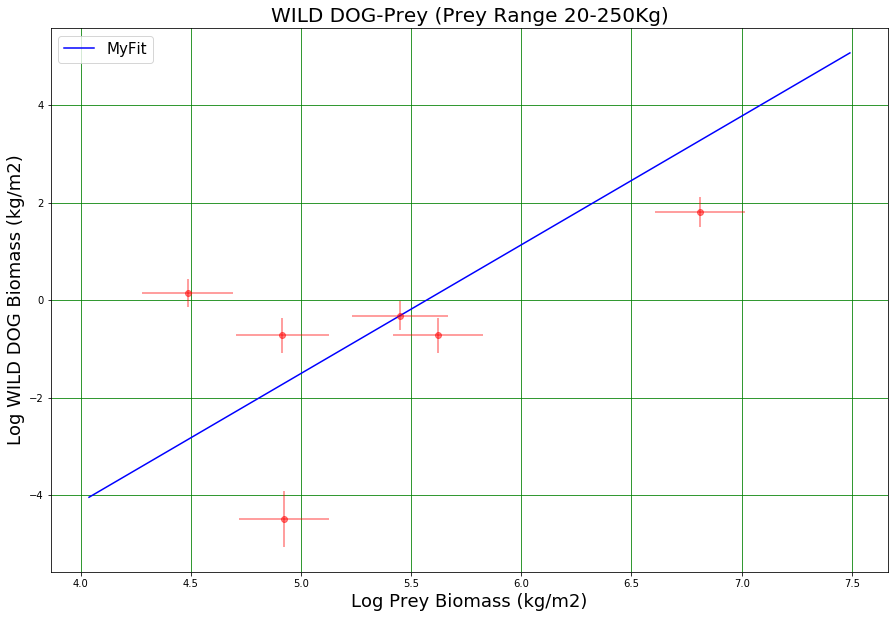

 
Date and time 2020-04-24 14:06:39.835524
Time since last check is 0:00:00.351082
 
Date and time 2020-04-24 14:06:39.836134
Time since last check is 0:00:00.000610


In [29]:
import datetime
import matplotlib.pyplot as plt
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# least_squares is a fitting routine
from scipy.optimize import least_squares
#
# This "line magic" ensures plots are displayed in the Notebook
%matplotlib inline
#
import sys
#
# Straight line, derivative and error calculation
def fitLine(p, x):
    '''
    Straight line
    '''
    f = p[0] + p[1]*x
    return f
#
def fitLineDiff(p, x):
    '''
    Differential of straight line
    '''
    df = p[1]
    return df
#
def fitLineError(p, x, y, xerr, yerr):
    '''
    Error (chi) function for straight line fit
    '''
    e = (y - fitLine(p, x))/(np.sqrt(yerr**2 + fitLineDiff(p, x)**2*xerr**2))
    return e
#
#
# Define NumPy arrays, initially filled with zeros, to store the x and y data values for the fit
if nPredRows != nPreyRows:
    print(" ")
    print("Mismatch in number of locations for predators",nPredCols,"and prey",nPreyCols,"stop fit!")
    sys.exit()
#
nPoints = nPredRows
xData = np.zeros(nPoints)
yData = np.zeros(nPoints)
print(" ")
print("Number of points",nPoints)
#
# Define arrays to store the errors in x and y
xError = np.zeros(nPoints)
yError = np.zeros(nPoints)
#


#
# Transfer predator and prey data to fit arrays
print(" ")
print("preyBarr\n",preyBarr)
print(" ")
print("predBarr\n",predBarr)
xData = np.log(preyBarr)
yData = np.log(predBarr)
#
# Add error guesses for predator and prey masses
xError = (1/preyBarr)*preyBerr
yError = (1/predBarr)*predBerr
#
print("xData\t\t\t yData")
for n in range(0, nPoints):
    print(f"{xData[n]:5.2f} +- {xError[n]:5.2f}\t\t {yData[n]:5.2f} +- {yError[n]:5.2f}")
#
xData = np.delete(xData,[0,2,3,4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,45,48])
yData = np.delete(yData,[0,2,3,4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,45,48])
xError = np.delete(xError,[0,2,3,4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,45,48])
yError = np.delete(yError,[0,2,3,4,5,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,33,34,35,36,37,38,39,40,41,42,45,48])
#
#
print(" ")
print("With points removed...")
print("xData\t\t\t yData")
for n in range(0, len(xData)):
    print(f"{xData[n]:5.2f} +- {xError[n]:5.2f}\t\t {yData[n]:5.2f} +- {yError[n]:5.2f}")
#
# Set initial values of fit parameters, run fit
pInit = [-1.0, 0.6]
out = least_squares(fitLineError, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    cVal = pFinal[0]
    mVal = pFinal[1]
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitLineError(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance from the Jacobian matrix returned by least_squares
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f}".format(cVal))
        print("Exp intercept = {:5.3f}".format(np.exp(cVal)))
        print("Gradient = {:5.3f}".format(mVal))
        print(" ")
        cErr = 0.0
        mErr = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        cErr = np.sqrt(covar[0, 0])
        mErr = np.sqrt(covar[1, 1])
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Intercept = {:5.3f} +- {:5.3f}".format(cVal, cErr))
        print("Exp intercept = {:5.3f} +- {:5.3f}".format(np.exp(cVal), np.abs(cVal*np.exp(cVal)*cErr)))
        print("Gradient = {:5.3f} +- {:5.3f}".format(mVal, mErr))
        print(" ")
    #
    # Calculate fitted function values
    xFit = np.linspace(0.9*np.amin(xData), 1.1*np.amax(xData), nPoints)
    fitData = fitLine(pFinal, xFit)
    #
       # Plot data
    fig = plt.figure(figsize = (15, 10))
    plt.title('WILD DOG-Prey (Prey Range 20-250Kg)', fontsize=20)
    plt.xlabel("Log Prey Biomass (kg/m2)", fontsize=18)
    plt.ylabel("Log WILD DOG Biomass (kg/m2)",fontsize=18)
    
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, color = 'r', marker = 'o', linestyle = '', alpha =0.5)
    plt.plot(xFit, fitData, color = 'b', linestyle = '-', label = "MyFit") 
    #plt.xlim(1.0, 7.0)
    #plt.ylim(0.0, 3.0)
#
# Paper fit
   # PaperY= [-1.17,4.78]
    #PaperX= [3,10.75]
#
    #plt.plot(PaperX, PaperY, color = 'k', linestyle = '-', label = "PaperFit", ) 
    plt.grid(color = 'g')
    plt.legend(fontsize=15)
    plt.show()
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))
   
#    
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))

# FITTING LINEAR DATA

In [ ]:
import datetime
now = datetime.datetime.now()
print("Date and time ",str(now))
#
# least_squares is a fitting routine
from scipy.optimize import least_squares
#
# This "line magic" ensures plots are displayed in the Notebook
%matplotlib inline
#
# Scaling law, derivative and error calculation
def fitScale(p, x):
    '''
    Scaling law
    '''
    f = p[0]*x**p[1]
    return f
#
def fitScaleDiff(p, x):
    '''
    Differential of scaling law
    '''
    df = p[0]*p[1]*x**(p[1] - 1)
    return df
#
def fitScaleError(p, x, y, xerr, yerr):
    '''
    Error function for scaling fit
    '''
    e = (y - fitScale(p, x))/(np.sqrt(yerr**2 + fitScaleDiff(p, x)**2*xerr**2))
    return e
#
# Transfer predator and prey data to fit arrays
xData = preyBarr
yData = predBarr
#
# Add error guesses for predator and prey masses
xError = preyBerr
yError = predBerr
#
# Set initial values of fit parameters, run fit
pInit = [0.01, -0.7]
out = least_squares(fitScaleError, pInit, args=(xData, yData, xError, yError))
#
fitOK = out.success
#
# Test if fit failed
if not fitOK:
    print(" ")
    print("Fit failed")
else:
    #
    # get output
    pFinal = out.x
    cVal = pFinal[0]
    mVal = pFinal[1]
    #
    #   Calculate chis**2 per point, summed chi**2 and chi**2/NDF
    chiarr = fitScaleError(pFinal, xData, yData, xError, yError)**2
    chisq = np.sum(chiarr)
    NDF = nPoints - 2
    redchisq = chisq/NDF
#
    np.set_printoptions(precision = 3)
    print(" ")
    print("Fit quality:")
    print("chisq per point = \n",chiarr)
    print("chisq = {:5.2f}, chisq/NDF = {:5.2f}.".format(chisq, redchisq))
    #
    # Compute covariance
    jMat = out.jac
    jMat2 = np.dot(jMat.T, jMat)
    detJmat2 = np.linalg.det(jMat2)
    #
    if detJmat2 < 1E-32:
        print("Value of determinat detJmat2",detJmat2)
        print("Matrix singular, error calculation failed.")
        print(" ")
        print("Parameters returned by fit:")
        print("Constant = {:5.3f}".format(cVal))
        print("Exponent = {:5.3f}".format(mVal))
        print(" ")
        cErr = 0.0
        mErr = 0.0
    else:
        covar = np.linalg.inv(jMat2)
        cErr = np.sqrt(covar[0, 0])
        mErr = np.sqrt(covar[1, 1])
        #
        print(" ")
        print("Parameters returned by fit:")
        print("Constant = {:5.3f} +- {:5.3f}".format(cVal, cErr))
        print("Exponent = {:5.3f} +- {:5.3f}".format(mVal, mErr))
        print(" ")
    #
    # Calculate fitted function values
    xFit = np.linspace(0.0, np.amax(xData), nPoints)
    fitData = fitScale(pFinal, xFit)
    #
    # Plot data
    fig = plt.figure(figsize = (8, 6))
    plt.title('Data with fit')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.errorbar(xData, yData, xerr = xError, yerr = yError, fmt='r', \
                 linestyle = '', label = "Data") 
    plt.plot(xFit, fitData, color = 'b', linestyle = '-', label = "Fit")
    #plt.xlim(1.0, 7.0)
    #plt.ylim(0.0, 3.0)
    plt.grid(color = 'g')
    plt.legend()
    plt.show()
#
then = now
now = datetime.datetime.now()
print(" ")
print("Date and time",str(now))
print("Time since last check is",str(now - then))
print('')
for n in range(0, nPoints):
    print(f"{xData[n]:5.2f} +- {xError[n]:5.2f}\t\t {yData[n]:5.2f} +- {yError[n]:5.2f}")